In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from scipy.optimize import curve_fit
%matplotlib inline

In [4]:
def set_ticklabels(ax, size=18):
    ticklabels_x = ax.get_xticklabels()
    ticklabels_y = ax.get_yticklabels()

    for label_x in ticklabels_x:
        label_x.set_fontsize(size)
        label_x.set_family('serif')
    for label_y in ticklabels_y:
        label_y.set_fontsize(size)
        label_y.set_family('serif')

In [87]:

def get_line(tau, vrot, vout):
    filename = '../data/tau{}/vrot{}/vout{}/tau{}_vrot{}_vout{}_out.ascii'.format(tau, vrot, vout, tau, vrot, vout)
    data = np.loadtxt(filename, skiprows=1)
    x_freq = data[:,6]
    k_z = data[:,5]
    vel_factor = 12.8
    ii = abs(k_z)<0.2
    vel_out = x_freq[ii]  * -vel_factor

    intensity , bins = np.histogram(vel_out, bins=20)
    intensity = intensity/(bins[1]-bins[0])
    center = 0.5*(bins[1:] + bins[:-1])
    norm = np.trapz(intensity, center)
    intensity = intensity/norm
    return intensity, center

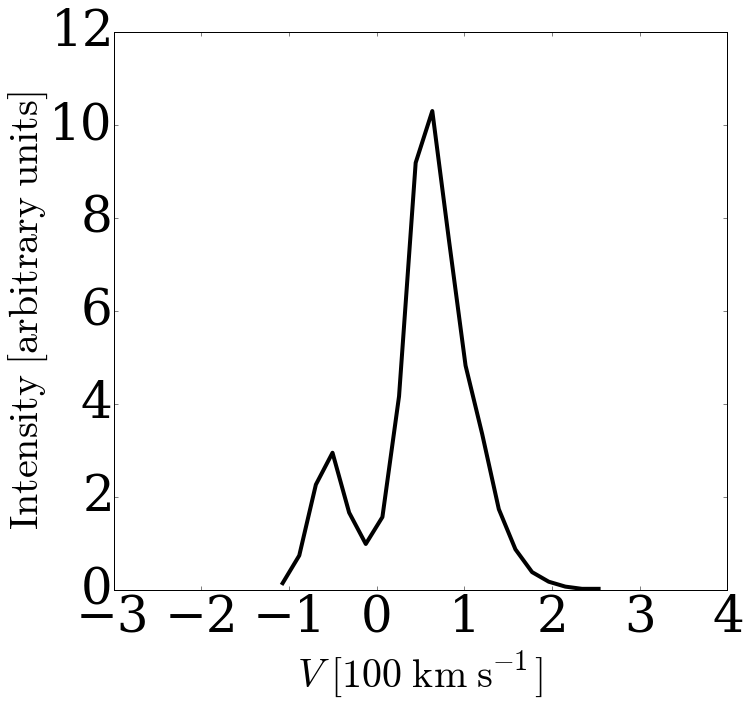

In [91]:
fig = plt.figure(1, figsize=(11,10))
ax = plt.axes()
set_ticklabels(ax, size=50)
    
tau = '10E5'
vrot = '0'
vout = '50'
line, vel = get_line(tau, vrot, vout)
plt.plot(vel/100, line*1000, alpha=1.0, linewidth=4, c='black')
plt.xlim(-3.0,4.0)
plt.xlabel(r'$V\ \mathrm{[100\ km\ s^{-1}]}$', size=40.0)
plt.ylabel(r'$\mathrm{Intensity\ [arbitrary\ units]}$', size=40.0)

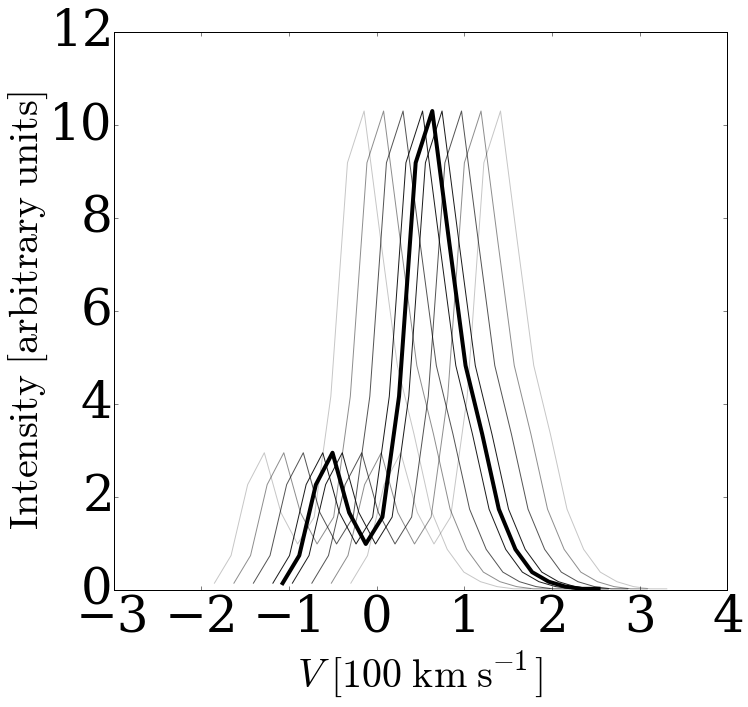

In [92]:
fig = plt.figure(1, figsize=(11,10))
ax = plt.axes()
set_ticklabels(ax, size=50)
    
tau = '10E5'
vrot = '0'
vout = '50'
line, vel = get_line(tau, vrot, vout)
plt.plot(vel/100, line*1000, alpha=1.0, linewidth=4, c='black')
shifts = np.linspace(-100, 100, 10)
for shift in shifts:
    plt.plot((vel+shift)/100.0, line*1000, alpha=(1.0 - abs(shift)/100), linewidth=1, c='black')
plt.xlim(-3.0,4.0)
plt.xlabel(r'$V\ \mathrm{[100\ km\ s^{-1}]}$', size=40.0)
plt.ylabel(r'$\mathrm{Intensity\ [arbitrary\ units]}$', size=40.0)

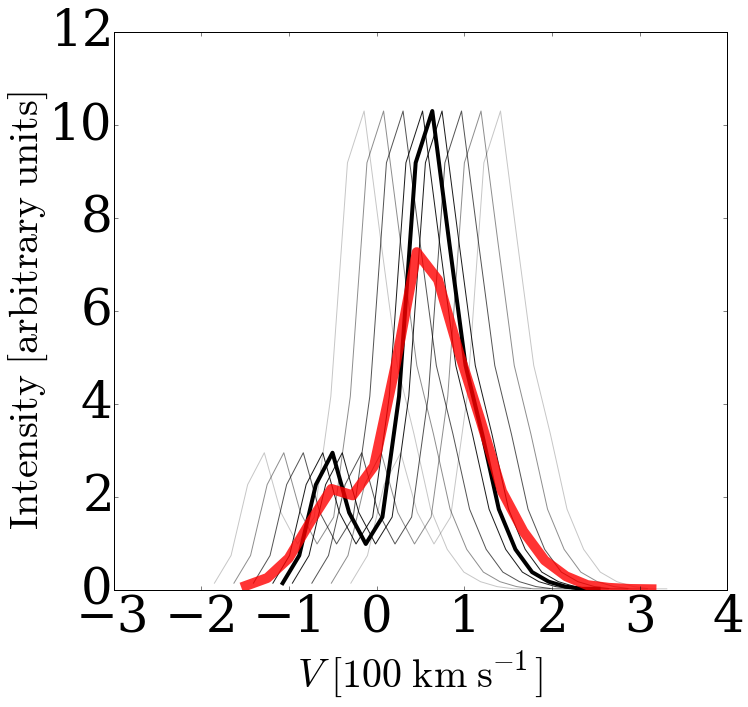

In [93]:
fig = plt.figure(1, figsize=(11,10))
ax = plt.axes()

tau = '10E5'
vrot = '0'
vout = '50'
line, vel = get_line(tau, vrot, vout)
plt.plot(vel/100, line*1000, alpha=1.0, linewidth=4, c='black')
shifts = np.linspace(-100, 100, 10)
for shift in shifts:
    plt.plot((vel+shift)/100.0, line*1000, alpha=(1.0 - abs(shift)/100), linewidth=1, c='black')
    

vrot = '100'
line, vel = get_line(tau, vrot, vout)
plt.plot(vel/100, line*1000, linewidth=10, c='red', alpha=0.8)
set_ticklabels(ax, size=50)
plt.xlim(-3.0,4.0)
plt.xlabel(r'$V\ \mathrm{[100\ km\ s^{-1}]}$', size=40.0)
plt.ylabel(r'$\mathrm{Intensity\ [arbitrary\ units]}$', size=40.0)